#**Problem 5: Auto-MPG Dataset — Standardization and Correlation**  

Use **Dataset B (Auto-MPG)**. Define TRI (7×ntrain), TRO (ntrain×1), TEI (7×ntest), TEO (ntest×1)
using the Dataset B split rules. Tasks
1. Compute Standardize each feature row of TRI using training means/stds (population std), and apply
to TEI. Do not standardize TRO/TEO for MSE reporting.
2. Compute Compute the 8 × 8 absolute Pearson correlation matrix among {x1, . . . , x7, y = mpg}.
Present C. Which input correlates most with y?
3. Plot Fig. 9: TRO vs TRI[0,:] (cylinders). Fig. 10: TRO vs TRI[3,:] (weight). Use labels/titles.
Create one additional figure showing all 7 features vs mpg in a 3×3 grid (jitter discrete features:
cylinders, model year, origin).

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
datasetB = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

columnNames = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

dataframeB = pd.read_csv(datasetB, names = columnNames, na_values = '?', sep = r'\s+', skipinitialspace = True) #whitespace delimiting

dataframeB['horsepower'] = pd.to_numeric(dataframeB['horsepower']) #making horsepower into numeric

dataframeB.dropna(inplace = True) #removing non numeric values

dataframeB.drop('car_name', axis = 1, inplace = True) #removing car names

print("dataset B features (7): \n", dataframeB)

dataset B features (7): 
       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin  
0            70       1  
1            70       1  
2            70       1  
3    

In [20]:
numpyB = dataframeB.to_numpy()

globalPermutation = np.random.permutation(numpyB.shape[0])
permData = numpyB[globalPermutation]

train = permData[:300] #300 indices
test = permData[300:392] #next 92

TRO = train[:, 0].reshape(-1, 1) #training mpg
TRI = train[:, 1:].T

TEO = test[:, 0].reshape(-1, 1) #testing mpg
TEI = test[:, 1:].T

In [24]:
trainMeans = np.mean(TRI, axis = 1, keepdims = True)
trainStd = np.std(TRI, axis = 1, ddof = 0, keepdims = True)

standardizedTRI = (TRI - trainMeans) / trainStd
standardizedTEI = (TEI - trainMeans) / trainStd

#print(standardizedTEI, "\n", standardizedTRI)


In [26]:
x = np.vstack([standardizedTRI, TRO.T])

C = np.corrcoef(x)

absoluteCorrelationMatrix = np.abs(C) #absolute value

print(absoluteCorrelationMatrix)

[[1.         0.94734422 0.83904714 0.8923711  0.49368745 0.39522574
  0.56561475 0.76952209]
 [0.94734422 1.         0.89436223 0.93688969 0.52851815 0.41716894
  0.61296365 0.79920438]
 [0.83904714 0.89436223 1.         0.86787261 0.68094261 0.44251831
  0.44588779 0.7721893 ]
 [0.8923711  0.93688969 0.86787261 1.         0.40077428 0.36072738
  0.58179136 0.83601897]
 [0.49368745 0.52851815 0.68094261 0.40077428 1.         0.29799615
  0.20163903 0.41531014]
 [0.39522574 0.41716894 0.44251831 0.36072738 0.29799615 1.
  0.18990064 0.61194409]
 [0.56561475 0.61296365 0.44588779 0.58179136 0.20163903 0.18990064
  1.         0.54319374]
 [0.76952209 0.79920438 0.7721893  0.83601897 0.41531014 0.61194409
  0.54319374 1.        ]]


In [32]:
yCorrelation = absoluteCorrelationMatrix[7, :7] #finding feature that correlates the most with mpg

mostCorrelatedFeature = np.argmax(yCorrelation)
mostCorrelatedValue = yCorrelation[mostCorrelatedFeature]

print(f"input = {mostCorrelatedFeature}, correlates most with y = {mostCorrelatedValue:.4f}")

input = 3, correlates most with y = 0.8360


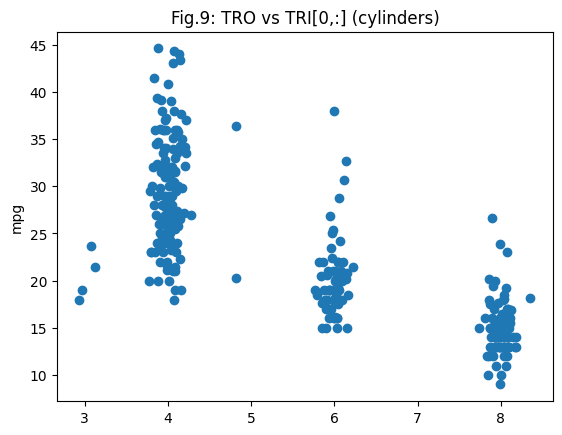

In [42]:
cylinders = TRI[0, :]
mpg = TRO.flatten()

cylindersJitter = cylinders + np.random.normal(0, 0.1, len(cylinders))

plt.scatter(x = cylindersJitter, y = mpg)
plt.ylabel("mpg")
plt.title("Fig.9: TRO vs TRI[0,:] (cylinders)")
plt.show()

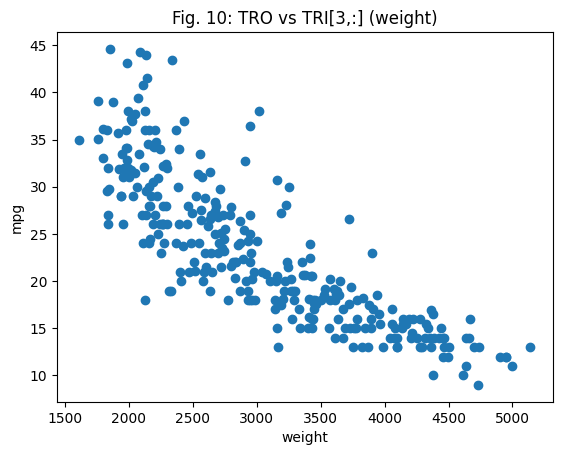

In [45]:
weight = TRI[3, :]

plt.scatter(x = weight, y = mpg)
plt.title('Fig. 10: TRO vs TRI[3,:] (weight)')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

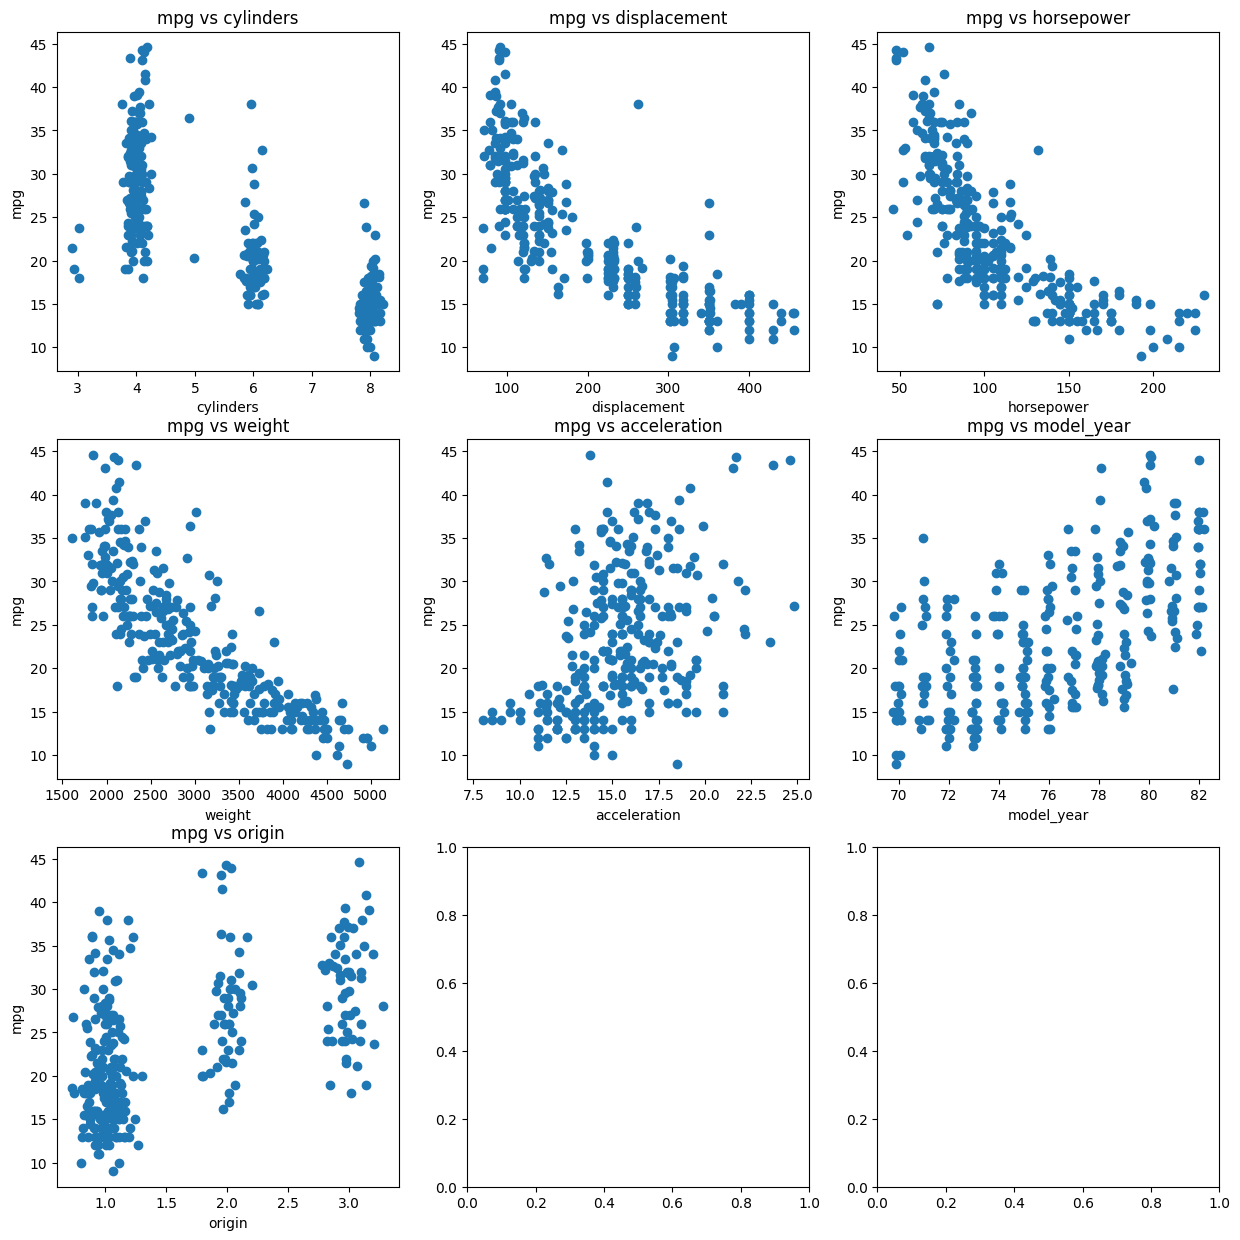

In [53]:
featureNames = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

discreteFeatures = {0, 5, 6} #need jitter; these are cylinders, model_year, and origin

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15)) #3x3 grid
axes = axes.flatten()

for i in range(7):
    ax = axes[i]
    feature = TRI[i, :]

    if i in discreteFeatures:
      featureJitter = feature + np.random.normal(0, 0.1, len(feature))
    else:
      featureJitter = feature

    ax.scatter(x = featureJitter, y = mpg)
    ax.set_title(f'mpg vs {featureNames[i]}')
    ax.set_xlabel(featureNames[i])
    ax.set_ylabel('mpg')

plt.show()